In [196]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [197]:
# load the dataset
df_2k = pd.read_csv('C:/Users/Teddy/Documents/NBA 2k20 player dataset/nba2k-full.csv')


In [198]:
# checking shape of the dataframe
df_2k.shape


(464, 15)

In [199]:
# display the first five rows of the dataset
df_2k.head(5)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


Data Preprocessing

In [200]:
# concise summary of the dataset
df_2k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


In [201]:
# list of columns in the dataset 
df_2k.columns

Index(['full_name', 'rating', 'jersey', 'team', 'position', 'b_day', 'height',
       'weight', 'salary', 'country', 'draft_year', 'draft_round',
       'draft_peak', 'college', 'version'],
      dtype='object')

In [202]:


# Function to convert height from feet-inches to meters
def convert_height(height):
    parts = height.split("/")
    if len(parts) >= 2:
        feet_inches = parts[0].strip()
        total_inches = int(feet_inches.split("-")[0]) * 12 + int(feet_inches.split("-")[1])
        return round(total_inches * 0.0254, 2)
    return 0.0

def convert_weight(weight):
    parts = weight.split("/")
    if len(parts) >= 2:
        pounds = parts[0].strip().split(" ")[0]
        kilograms = float(pounds) * 0.45359237
        return round(kilograms, 2)
    return 0.0


# Convert height to meters and create a new column "height_in_m"
df_2k["height_in_m"] = df_2k["height"].apply(lambda x: convert_height(x))

# Convert weight to kilograms and create a new column "weight_in_kg"
df_2k["weight_in_kg"] = df_2k["weight"].apply(lambda x: convert_weight(x))

# Drop the original height and weight columns
df_2k.drop(columns=["height", "weight"], inplace=True)

# Remove dollar sign from salary column and convert to integer
df_2k["salary"] = df_2k["salary"].str.replace("$", "").astype(int)

# Calculate current age and create a new column "current_age"
df_2k["current_age"] = df_2k["b_day"].apply(lambda x: from_date_to_age(x))

# Calculate years played
df_2k["years_played"] = datetime.date.today().year - df_2k["draft_year"]

# Replace "Undrafted" with 0 in draft_round and draft_peak columns
df_2k["draft_round"] = df_2k["draft_round"].replace({"Undrafted": 0})
df_2k["draft_peak"] = df_2k["draft_peak"].replace({"Undrafted": 0})

# Drop the "b_day" column
df_2k.drop(columns=["b_day","college"], inplace=True)

# Calculate body mass index (BMI) and create a new column "body_mass_index"
df_2k["body_mass_index"] = df_2k["weight_in_kg"] / ((df_2k["height_in_m"] / 100) ** 2)

# Categorize BMI into "Underweight", "Normal", "Overweight", and "Obese"
df_2k["bmi_class"] = pd.cut(df_2k["body_mass_index"], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=["Underweight", "Normal", "Overweight", "Obese"], right=False)





C:\Users\Teddy\AppData\Local\Temp\ipykernel_4868\373723846.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_2k["salary"] = df_2k["salary"].str.replace("$", "").astype(int)


In [203]:
# concise summary of the dataset after transformation of string values
df_2k.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   full_name        464 non-null    object  
 1   rating           464 non-null    int64   
 2   jersey           464 non-null    object  
 3   team             441 non-null    object  
 4   position         464 non-null    object  
 5   salary           464 non-null    int32   
 6   country          464 non-null    object  
 7   draft_year       464 non-null    int64   
 8   draft_round      464 non-null    object  
 9   draft_peak       464 non-null    object  
 10  version          464 non-null    object  
 11  height_in_m      464 non-null    float64 
 12  weight_in_kg     464 non-null    float64 
 13  current_age      464 non-null    int64   
 14  years_played     464 non-null    int64   
 15  body_mass_index  464 non-null    float64 
 16  bmi_class        464 non-null    category
dt

In [204]:
# list of columns in the dataset after transformation
df_2k.columns


Index(['full_name', 'rating', 'jersey', 'team', 'position', 'salary',
       'country', 'draft_year', 'draft_round', 'draft_peak', 'version',
       'height_in_m', 'weight_in_kg', 'current_age', 'years_played',
       'body_mass_index', 'bmi_class'],
      dtype='object')

In [205]:
# first five rows of the dataset after transformation
df_2k.head(5)


,full_name,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version,height_in_m,weight_in_kg,current_age,years_played,body_mass_index,bmi_class
0,LeBron James,97,#23,Los Angeles Lakers,F,37436858,USA,2003,1,1,NBA2k20,2.06,113.40,38,20,267225.940239,Obese
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,32742000,USA,2011,1,15,NBA2k20,2.01,102.06,31,12,252617.509468,Obese
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,25842697,Greece,2013,1,15,NBA2k20,2.11,109.77,28,10,246557.804182,Obese
3,Kevin Durant,96,#7,Brooklyn Nets,F,37199000,USA,2007,1,2,NBA2k20,2.08,104.33,34,16,241147.374260,Obese
4,James Harden,96,#13,Houston Rockets,G,38199000,USA,2009,1,3,NBA2k20,1.96,99.79,33,14,259761.557684,Obese


In [206]:
# understanding statistics in the dataset while applying a gradient to the background color of the cells
df_2k.describe().style.background_gradient(cmap='Greens')

,rating,salary,draft_year,height_in_m,weight_in_kg,current_age,years_played,body_mass_index
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,77.568966,10325450.105603,2013.892241,1.996573,97.402069,29.433190,9.107759,243999.070376
std,6.933780,11234050.960197,3.997465,0.085295,10.555294,4.101290,3.997465,17619.437888
min,67.000000,50000.000000,2001.000000,1.750000,77.110000,22.000000,4.000000,203212.791763
25%,73.000000,2168122.500000,2011.000000,1.930000,89.360000,26.000000,6.000000,231411.735296
50%,76.000000,4861623.500000,2015.000000,2.010000,97.520000,29.000000,8.000000,242155.839744
75%,80.000000,14639155.000000,2017.000000,2.060000,104.330000,32.000000,12.000000,254869.928962
max,97.000000,45780966.000000,2019.000000,2.240000,131.540000,42.000000,22.000000,328588.919498


In [207]:
# calculate the sum of missing values of each column in the dataset
df_2k.isnull().sum()


full_name           0
rating              0
jersey              0
team               23
position            0
salary              0
country             0
draft_year          0
draft_round         0
draft_peak          0
version             0
height_in_m         0
weight_in_kg        0
current_age         0
years_played        0
body_mass_index     0
bmi_class           0
dtype: int64

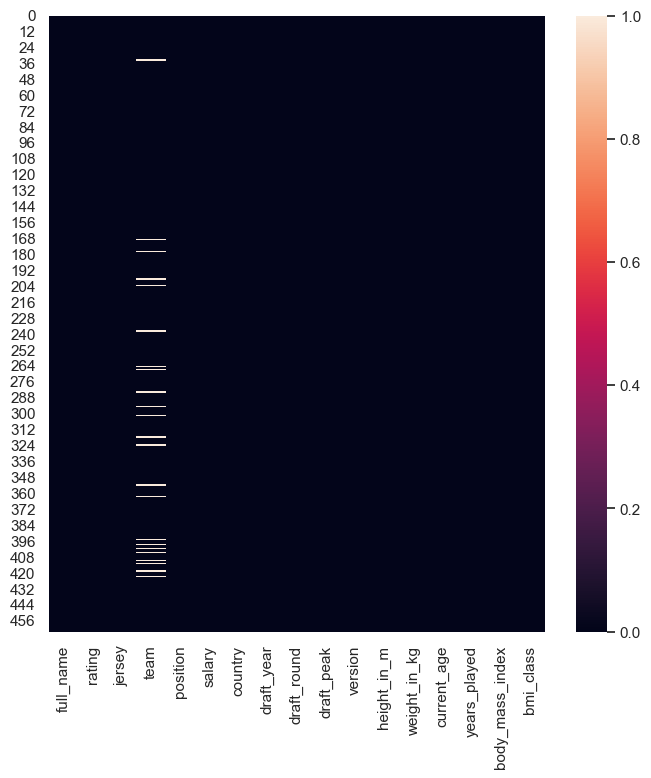

In [208]:
# heatmap visualization of the missing values in the dataset
plt.figure(figsize=(8,8))
sns.heatmap(df_2k.isnull())
plt.show()


In [209]:
# calculation of the percentage of missing value in each column of the dataset and printing out the result
missing_value_percentage = df_2k.isnull().sum() /df_2k.shape[0] * 100
print(missing_value_percentage)


full_name          0.000000
rating             0.000000
jersey             0.000000
team               4.956897
position           0.000000
salary             0.000000
country            0.000000
draft_year         0.000000
draft_round        0.000000
draft_peak         0.000000
version            0.000000
height_in_m        0.000000
weight_in_kg       0.000000
current_age        0.000000
years_played       0.000000
body_mass_index    0.000000
bmi_class          0.000000
dtype: float64


In [210]:
# The rows with missing values in the 'team' column are dropped 
df_2k.dropna(subset=['team'], inplace=True)


In [211]:
# Remove duplicates based on 'full_name' column
df_2k_unique = df_2k.drop_duplicates(subset='full_name', keep='first')


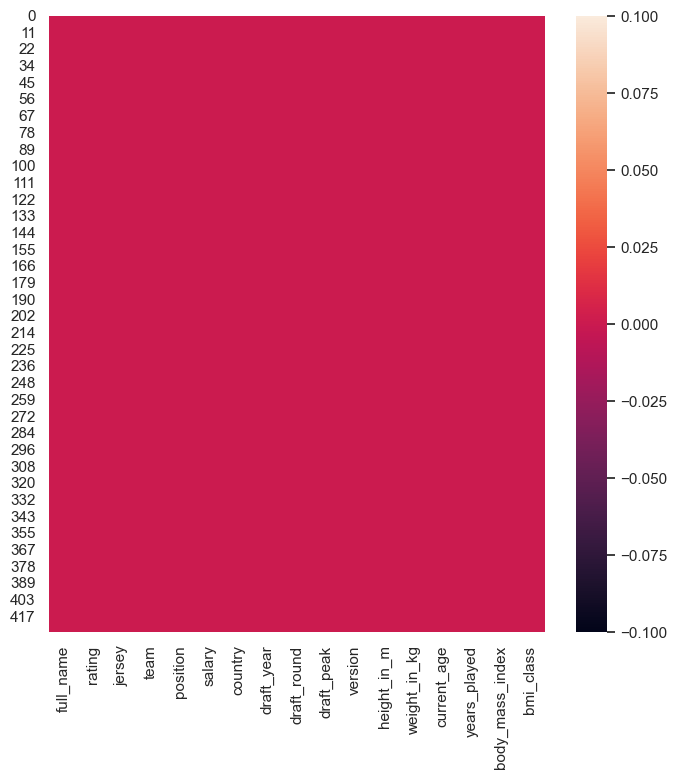

In [212]:
# heatmap visualization of 'cleaned dataset'
plt.figure(figsize=(8,8))
sns.heatmap(df_2k_unique.isnull())
plt.show()



EDA Process


C:\Users\Teddy\AppData\Local\Temp\ipykernel_4868\1615788760.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_2k_unique.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='coolwarm')


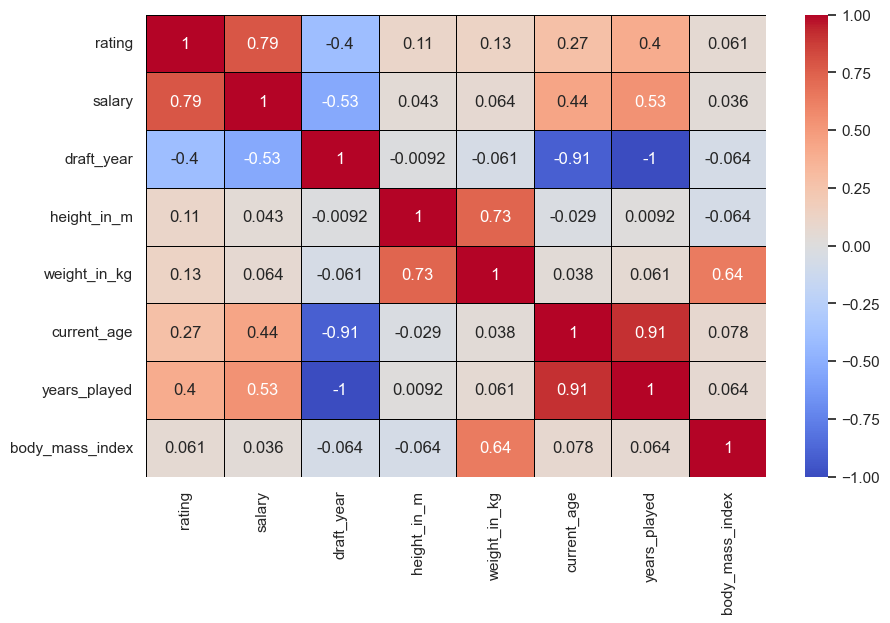

In [213]:
# heatmap of to get an idea about the correlation between variables, 
# the color intensity represents the strength and direction of the correlation between different variables 
plt.figure(figsize=(10,6))
sns.heatmap(df_2k_unique.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='coolwarm')
plt.show()

In [214]:
# Display top 10 highest rated players 
print('Top 10 Highest Rated Players\n')
print(df_2k_unique.sort_values('rating', ascending=False).head(10)[['full_name','position','rating','salary']].to_string(index=False))


Top 10 Highest Rated Players

            full_name position  rating   salary
         LeBron James        F      97 37436858
        Kawhi Leonard        F      97 32742000
Giannis Antetokounmpo      F-G      96 25842697
         Kevin Durant        F      96 37199000
         James Harden        G      96 38199000
        Stephen Curry        G      95 40231758
        Anthony Davis      F-C      94 27093019
          Paul George        F      93 33005556
       Damian Lillard        G      92 29802321
          Joel Embiid        C      91 27504630


In [215]:
# top countries in terms of number of players in the league
x = df_2k_unique.groupby('country').agg({'full_name':np.count_nonzero, 'rating': np.mean}).rename(columns={'full_name':'Number of Players', 'rating':'Average Rating'}).reset_index()
print('Top 5 Countries in NBA player count\n')
print(x.sort_values(by='Number of Players', ascending=False).head().to_string(index=False))


Top 5 Countries in NBA player count

  country  Number of Players  Average Rating
      USA                302       76.476821
   Canada                 15       75.800000
Australia                  9       77.444444
   France                  8       75.750000
  Croatia                  6       76.166667


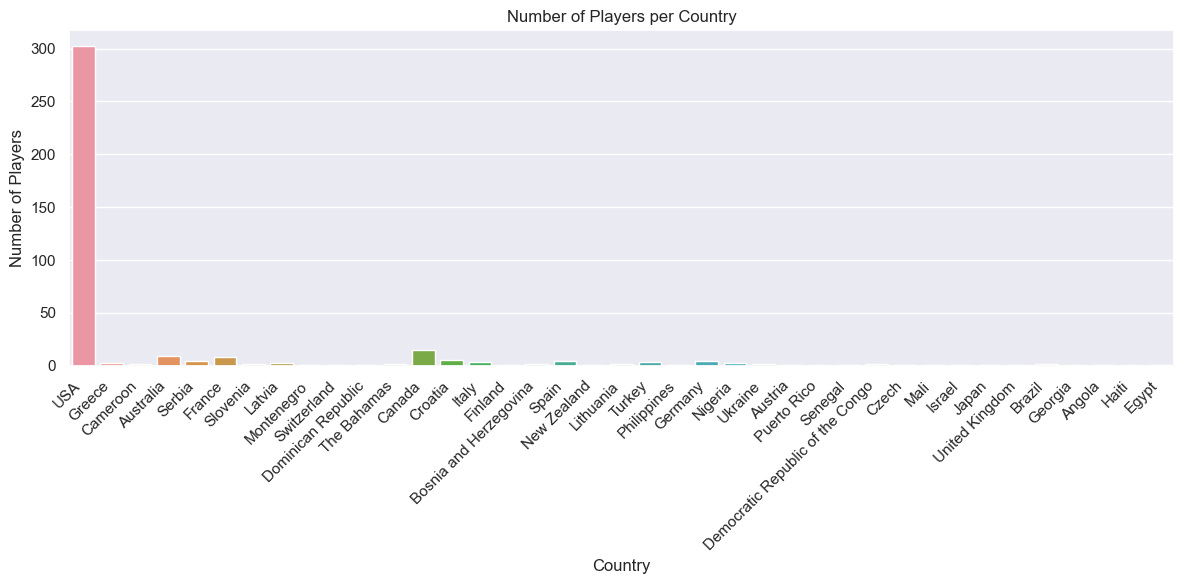

In [216]:
#  bar plot:number of players per country
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="country", data=df_2k_unique)
plt.title("Number of Players per Country")
plt.xlabel("Country")
plt.ylabel("Number of Players")

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()



The majority of NBA players hail from the United States and Canada.

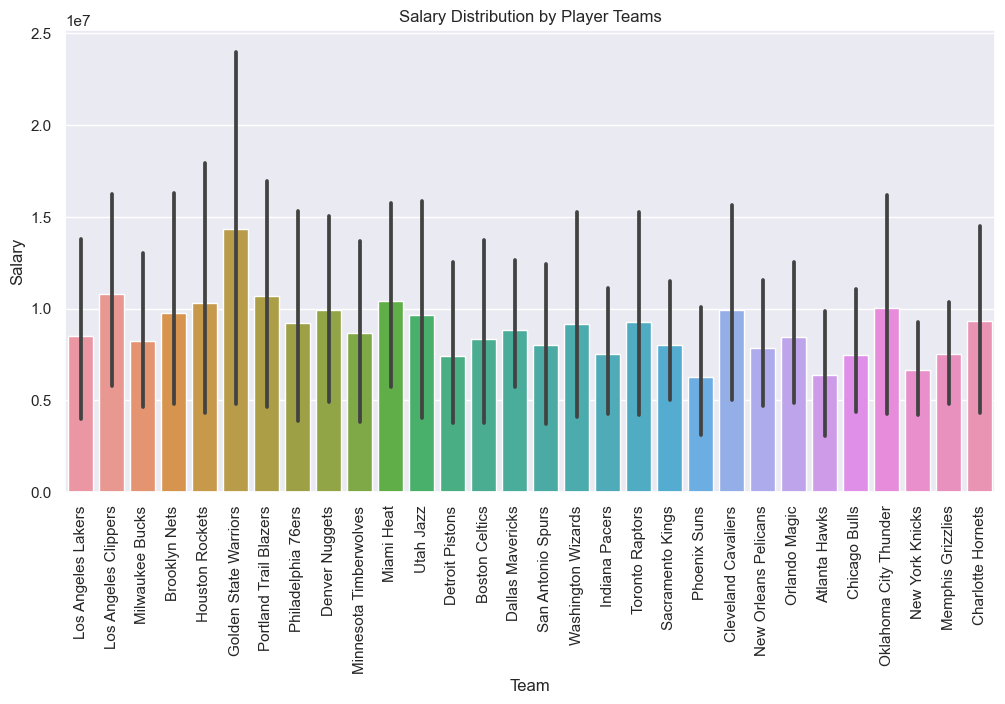

In [217]:
# bar plot:salary distribution based on player team

plt.figure(figsize=(12, 6))  # Set the figure size

sns.barplot(x='team', y='salary', data=df_2k_unique)

plt.xlabel('Team')
plt.ylabel('Salary')
plt.title('Salary Distribution by Player Teams')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()



The Golden State Warriors have the highest salary caps among NBA teams, whereas the New York Knicks have the lowest.

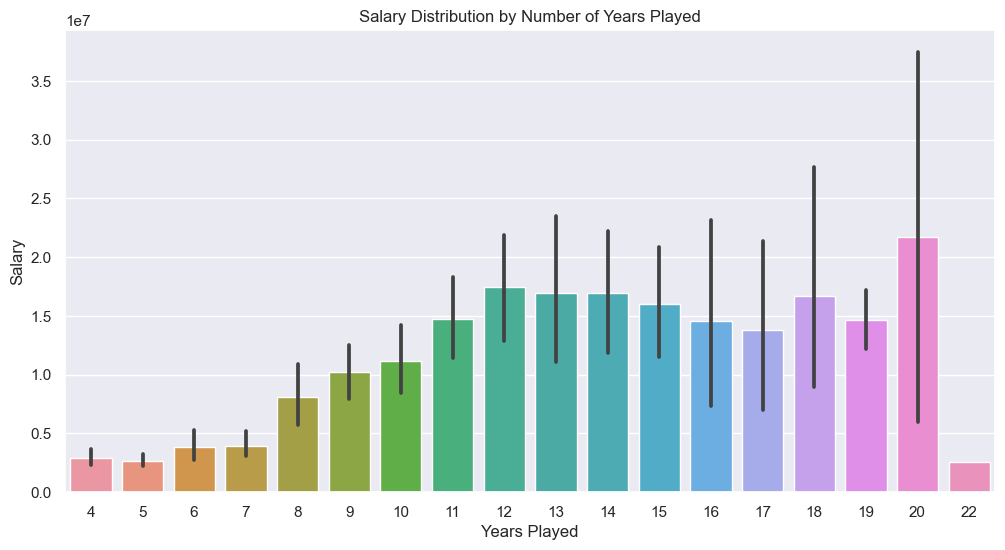

In [218]:
# barplot: relationship between salary and the number of years played

plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='years_played', y='salary', data=df_2k_unique)
plt.xlabel('Years Played')
plt.ylabel('Salary')
plt.title('Salary Distribution by Number of Years Played')
plt.show()


During their rookie seasons and the years leading up to their rookie-contract extensions, players tend to earn relatively low salaries. However, as experienced players, their value is recognized by their respective teams, resulting in higher earnings. Some veterans are retained on minimum contracts to maintain team cohesion within the locker room.


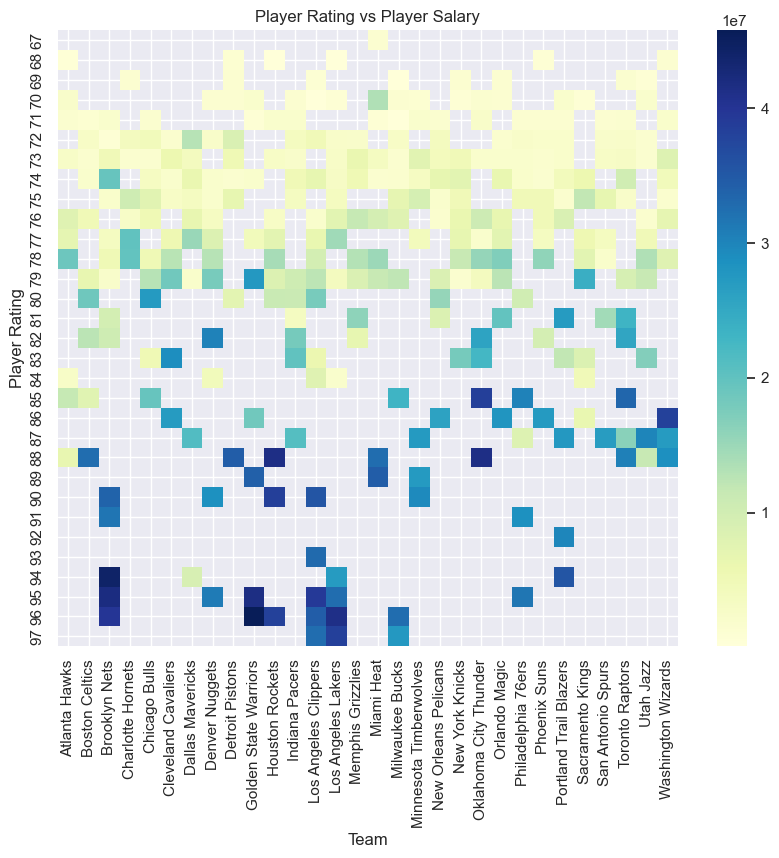

In [219]:
# heatmap:the x-axis represents the teams, the y-axis represents the player ratings,
#  and the color intensity represents the average salary

# Pivot the data to create a salary matrix with player rating as rows and teams as columns
salary_matrix = df_2k.pivot_table(index='rating', columns='team', values='salary', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(salary_matrix, cmap='YlGnBu')

plt.xlabel('Team')
plt.ylabel('Player Rating')
plt.title('Player Rating vs Player Salary')
plt.show()



The average player salary by rating is relatively similar across all teams, indicating a fair distribution of pay in the NBA.

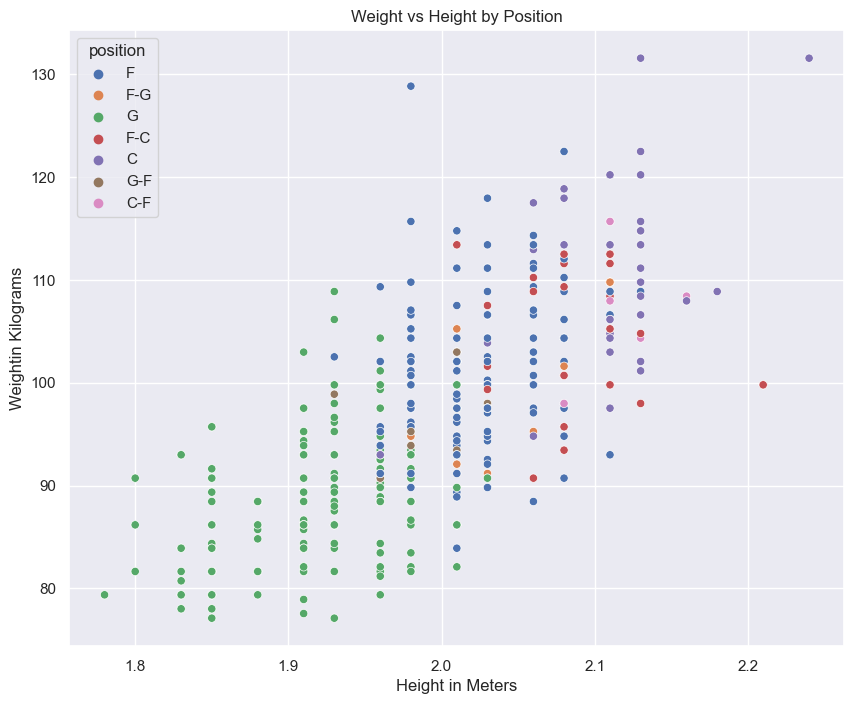

In [220]:
# scatter plot:relationship between weight and height for different player positions.

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_2k, x='height_in_m', y='weight_in_kg', hue='position')
plt.xlabel('Height in Meters')
plt.ylabel('Weightin Kilograms')
plt.title('Weight vs Height by Position')
plt.show()


Guards are generally smaller in size compared to players in other positions, while Centers and Forward-Centers are the largest. Nevertheless, there are skilled players who excel in their respective positions despite not having the typical size expected for their role.

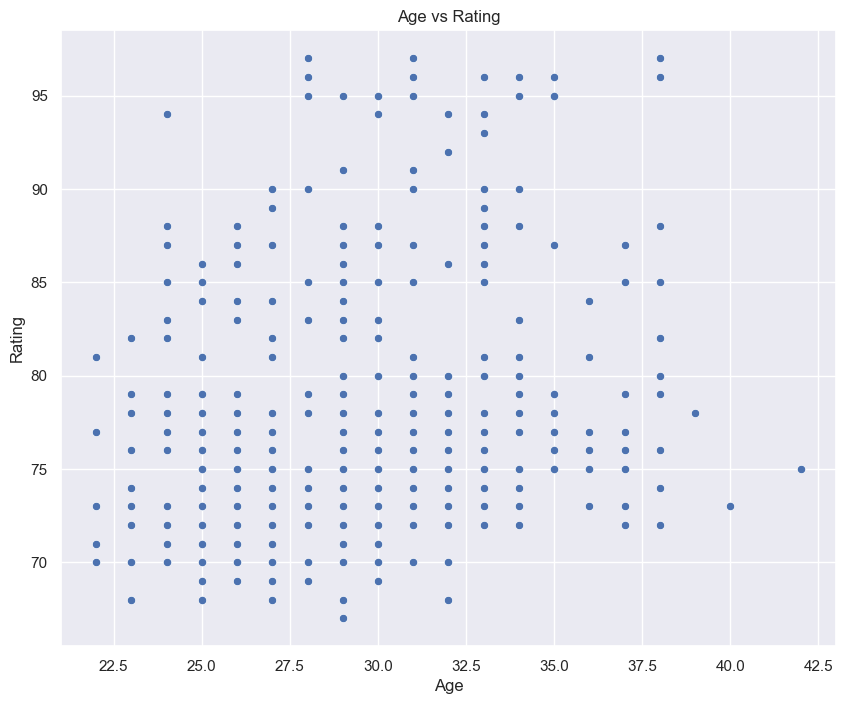

In [221]:
#scatterplot : relationship between player age vs rating

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_2k, x='current_age', y='rating')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Age vs Rating')
plt.show()


Young players tend to have lower ratings as they are often still developing and may face challenges such as injuries caused by the physically demanding nature of the NBA compared to college basketball. While a few older players continue to perform at a high level, most aging players tend to have lower ratings.